In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train = pd.read_csv("train_BM.csv")
test = pd.read_csv("test_BM.csv")
sample = pd.read_csv("sample_BM.csv")

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.shape

(8523, 12)

In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
test.shape

(5681, 11)

In [7]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.describe(include = "all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [11]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
DRE49     9
FDW49     9
FDF56     9
         ..
FDY43     1
FDE52     1
FDK57     1
FDO33     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [13]:
train["Item_Identifier"].shape

(8523,)

In [14]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
train["source"] = "train"
test["source"] = "test"

In [16]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [17]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [18]:
df = pd.concat([train,test])

In [19]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [20]:
df.shape

(14204, 13)

In [21]:
df["Item_Identifier"]

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [22]:
df["Item_Identifier_2"]=df["Item_Identifier"].apply(lambda x : x[0:2])
df["Item_Identifier_2"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [23]:
df["Item_Identifier_3"]=df["Item_Identifier"].apply(lambda x : x[0:3])
df["Item_Identifier_3"].value_counts()

FDT    467
FDW    460
FDX    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Identifier_3, Length: 71, dtype: int64

In [24]:
del df["Item_Identifier_2"]

In [25]:
df["Item_Weight"]

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [26]:
df["Item_Weight"].isna().sum()

2439

In [27]:
pd.set_option("display.max_columns", None)

In [28]:
df["Item_Weight"]

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [29]:
df.iloc[0:100,1]

0      9.30
1      5.92
2     17.50
3     19.20
4      8.93
      ...  
95      NaN
96    12.15
97     8.75
98      NaN
99     8.75
Name: Item_Weight, Length: 100, dtype: float64

In [30]:
df.iloc[97]

Item_Identifier                              FDB56
Item_Weight                                   8.75
Item_Fat_Content                           Regular
Item_Visibility                          0.0746131
Item_Type                    Fruits and Vegetables
Item_MRP                                   187.456
Outlet_Identifier                           OUT035
Outlet_Establishment_Year                     2004
Outlet_Size                                  Small
Outlet_Location_Type                        Tier 2
Outlet_Type                      Supermarket Type1
Item_Outlet_Sales                          3755.11
source                                       train
Item_Identifier_3                              FDB
Name: 97, dtype: object

In [31]:
df.iloc[99]

Item_Identifier                              FDB56
Item_Weight                                   8.75
Item_Fat_Content                           Regular
Item_Visibility                          0.0746272
Item_Type                    Fruits and Vegetables
Item_MRP                                   187.856
Outlet_Identifier                           OUT046
Outlet_Establishment_Year                     1997
Outlet_Size                                  Small
Outlet_Location_Type                        Tier 1
Outlet_Type                      Supermarket Type1
Item_Outlet_Sales                          1314.29
source                                       train
Item_Identifier_3                              FDB
Name: 99, dtype: object

In [32]:
df.iloc[47]

Item_Identifier                          FDV49
Item_Weight                                 10
Item_Fat_Content                       Low Fat
Item_Visibility                      0.0258796
Item_Type                               Canned
Item_MRP                               265.223
Outlet_Identifier                       OUT045
Outlet_Establishment_Year                 2002
Outlet_Size                                NaN
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                       5815.1
source                                   train
Item_Identifier_3                          FDV
Name: 47, dtype: object

In [33]:
df.iloc[60]

Item_Identifier                              FDM20
Item_Weight                                     10
Item_Fat_Content                           Low Fat
Item_Visibility                                  0
Item_Type                    Fruits and Vegetables
Item_MRP                                   246.914
Outlet_Identifier                           OUT018
Outlet_Establishment_Year                     2009
Outlet_Size                                 Medium
Outlet_Location_Type                        Tier 3
Outlet_Type                      Supermarket Type2
Item_Outlet_Sales                          3185.19
source                                       train
Item_Identifier_3                              FDM
Name: 60, dtype: object

In [34]:
 df.groupby("Item_Identifier_3").Item_Weight.transform(lambda x : x.fillna(x.mean()))

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [35]:
df["Item_Weight"] = df.groupby("Item_Identifier_3").Item_Weight.transform(lambda x : x.fillna(x.mean()))

In [36]:
df["Item_Fat_Content"].nunique()

5

In [37]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [38]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [39]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [40]:
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.000000
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

<AxesSubplot:ylabel='Frequency'>

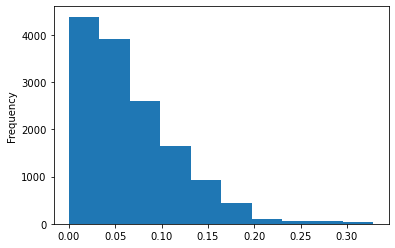

In [41]:
df["Item_Visibility"].plot(kind = "hist")

In [42]:
df.sort_values(by=['Item_Identifier','Item_Visibility'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_3
1197,DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,train,DRA
1693,DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,train,DRA
3912,DRA12,13.073333,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,DRA
1245,DRA12,11.600000,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,train,DRA
500,DRA12,11.600000,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,DRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.650000,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288,train,NCZ
1969,NCZ54,14.650000,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728,train,NCZ
7738,NCZ54,14.650000,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832,train,NCZ
4700,NCZ54,14.650000,Low Fat,0.083831,Household,161.4552,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,NCZ


In [43]:
df.loc[df["Item_Visibility"] == 0.000000,"Item_Visibility"] = np.NAN

In [44]:
df["Item_Visibility"].isna().sum()

879

In [45]:
df.groupby(["Item_Identifier_3"]).Item_Visibility.transform(lambda x : x.fillna(x.mean()))

0       0.016047
1       0.019278
2       0.016760
3       0.071579
4       0.038045
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.074380
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [46]:
df["Item_Visibility"] = df.groupby(["Item_Identifier_3"]).Item_Visibility.transform(lambda x : x.fillna(x.mean()))

In [47]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [48]:
df["Item_Type"].isna().sum()

0

In [49]:
len (df["Item_Type"].value_counts())

16

In [50]:
df["Item_Type"].nunique()

16

In [51]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [52]:
df["Item_MRP"].isna().sum()

0

In [53]:
df["Item_MRP"].nunique()

8052

In [54]:
df["Item_MRP"].shape

(14204,)

<AxesSubplot:ylabel='Frequency'>

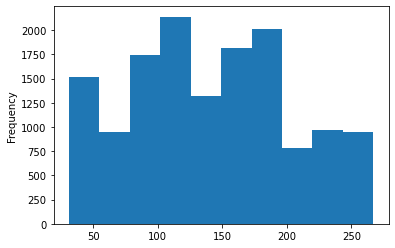

In [55]:
df["Item_MRP"].plot(kind = "hist")

In [56]:
df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [57]:
df["Outlet_Identifier"].nunique()

10

In [58]:
df["Outlet_Identifier"].isna().sum()

0

In [59]:
df["Outlet_Establishment_Year"].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [60]:
df["Outlet_Establishment_Year"].nunique()

9

In [61]:
df["Outlet_Establishment_Year"].shape

(14204,)

In [62]:
df["Outlet_Identifier"].shape

(14204,)

In [63]:
df.groupby("Outlet_Establishment_Year").Outlet_Identifier.value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               1559
                           OUT019                880
1987                       OUT013               1553
1997                       OUT046               1550
1998                       OUT010                925
1999                       OUT049               1550
2002                       OUT045               1548
2004                       OUT035               1550
2007                       OUT017               1543
2009                       OUT018               1546
Name: Outlet_Identifier, dtype: int64

In [64]:
from datetime import datetime

In [65]:
datetime.now().year

2021

In [66]:
df["Outlet_Age"] = datetime.now().year-df["Outlet_Establishment_Year"]

In [67]:
df["Outlet_Age"].isna().sum()

0

In [68]:
df["Outlet_Age"].shape

(14204,)

In [69]:
del df["Outlet_Establishment_Year"]

In [70]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [71]:
df["Outlet_Size"].isna().sum()

4016

In [72]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.015823,0.031905,0.010022,-0.000414
Item_Visibility,-0.015823,1.000000,-0.008018,-0.132913,0.088054
Item_MRP,0.031905,-0.008018,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.010022,-0.132913,0.567574,1.000000,0.049135
Outlet_Age,-0.000414,0.088054,-0.000141,0.049135,1.000000


In [73]:
df.groupby(["Outlet_Identifier"]).Outlet_Size.value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [74]:
df.groupby(["Outlet_Identifier"]).Outlet_Size.transform(lambda x : x.fillna(x.mode()))

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [75]:
df.groupby(["Outlet_Location_Type"]).Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                Small          1550
Tier 3                Medium         3105
                      High           1553
Name: Outlet_Size, dtype: int64

In [76]:
df.groupby(["Outlet_Location_Type", "Outlet_Type"]).Outlet_Size.transform(lambda x: x.fillna(x.mode()))

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [77]:
df.groupby(["Outlet_Type"]).Outlet_Size.transform(lambda x: x.fillna(x.mode()))

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [78]:
df["Outlet_Size"]=df.groupby(["Outlet_Type"]).Outlet_Size.transform(lambda x:x.fillna(x.mode()))

In [79]:
df["Outlet_Type"].isna().sum()

0

In [80]:
df["Outlet_Location_Type"].isna().sum()

0

In [81]:
df["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [82]:
df["Outlet_Type"].apply(lambda x : x.split()[0])

0       Supermarket
1       Supermarket
2       Supermarket
3           Grocery
4       Supermarket
           ...     
5676    Supermarket
5677    Supermarket
5678    Supermarket
5679    Supermarket
5680    Supermarket
Name: Outlet_Type, Length: 14204, dtype: object

In [83]:
df["Outlet_Type_Category"] = df["Outlet_Type"].apply(lambda x : x.split()[0])

In [84]:
df["Outlet_Type_Category"].value_counts()

Supermarket    12399
Grocery         1805
Name: Outlet_Type_Category, dtype: int64

In [85]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.015823,0.031905,0.010022,-0.000414
Item_Visibility,-0.015823,1.000000,-0.008018,-0.132913,0.088054
Item_MRP,0.031905,-0.008018,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.010022,-0.132913,0.567574,1.000000,0.049135
Outlet_Age,-0.000414,0.088054,-0.000141,0.049135,1.000000


In [86]:
df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,22
1,5.92,0.019278,48.2692,12
2,17.50,0.016760,141.6180,22
3,19.20,0.071579,182.0950,23
4,8.93,0.038045,53.8614,34
...,...,...,...,...
5676,10.50,0.013496,141.3154,24
5677,7.60,0.142991,169.1448,12
5678,10.00,0.073529,118.7440,19
5679,15.30,0.074380,214.6218,14


In [87]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

           feature       VIF
0      Item_Weight  6.393388
1  Item_Visibility  2.902347
2         Item_MRP  4.938940
3       Outlet_Age  6.184398


In [88]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# the independent variables set 
X = df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"]) 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

           feature       VIF
0      Item_Weight  6.393388
1  Item_Visibility  2.902347
2         Item_MRP  4.938940
3       Outlet_Age  6.184398


In [89]:
df_number_columns = df.select_dtypes(include = np.number).columns

In [90]:
df_number_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [91]:
df_category_columns = df.select_dtypes(exclude = np.number).columns

In [92]:
df_category_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source',
       'Item_Identifier_3', 'Outlet_Type_Category'],
      dtype='object')

In [93]:
data_to_encode = df[df_category_columns].drop(columns = ["Item_Identifier","Outlet_Identifier", "source"])

In [94]:
df_category_encoded = pd.get_dummies(data_to_encode)

In [95]:
df_category_encoded

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_3_DRA,Item_Identifier_3_DRB,Item_Identifier_3_DRC,Item_Identifier_3_DRD,Item_Identifier_3_DRE,Item_Identifier_3_DRF,Item_Identifier_3_DRG,Item_Identifier_3_DRH,Item_Identifier_3_DRI,Item_Identifier_3_DRJ,Item_Identifier_3_DRK,Item_Identifier_3_DRL,Item_Identifier_3_DRM,Item_Identifier_3_DRN,Item_Identifier_3_DRO,Item_Identifier_3_DRP,Item_Identifier_3_DRQ,Item_Identifier_3_DRY,Item_Identifier_3_DRZ,Item_Identifier_3_FDA,Item_Identifier_3_FDB,Item_Identifier_3_FDC,Item_Identifier_3_FDD,Item_Identifier_3_FDE,Item_Identifier_3_FDF,Item_Identifier_3_FDG,Item_Identifier_3_FDH,Item_Identifier_3_FDI,Item_Identifier_3_FDJ,Item_Identifier_3_FDK,Item_Identifier_3_FDL,Item_Identifier_3_FDM,Item_Identifier_3_FDN,Item_Identifier_3_FDO,Item_Identifier_3_FDP,Item_Identifier_3_FDQ,Item_Identifier_3_FDR,Item_Identifier_3_FDS,Item_Identifier_3_FDT,Item_Identifier_3_FDU,Item_Identifier_3_FDV,Item_Identifier_3_FDW,Item_Identifier_3_FDX,Item_Identifier_3_FDY,Item_Identifier_3_FDZ,Item_Identifier_3_NCA,Item_Identifier_3_NCB,Item_Identifier_3_NCC,Item_Identifier_3_NCD,Item_Identifier_3_NCE,Item_Identifier_3_NCF,Item_Identifier_3_NCG,Item_Identifier_3_NCH,Item_Identifier_3_NCI,Item_Identifier_3_NCJ,Item_Identifier_3_NCK,Item_Identifier_3_NCL,Item_Identifier_3_NCM,Item_Identifier_3_NCN,Item_Identifier_3_NCO,Item_Identifier_3_NCP,Item_Identifier_3_NCQ,Item_Identifier_3_NCR,Item_Identifier_3_NCS,Item_Identifier_3_NCT,Item_Identifier_3_NCU,Item_Identifier_3_NCV,Item_Identifier_3_NCW,Item_Identifier_3_NCX,Item_Identifier_3_NCY,Item_Identifier_3_NCZ,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5677,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [96]:
df_category_encoded.shape

(14204, 101)

In [97]:
df_final = pd.concat([df_category_encoded, df[df_number_columns],df[["Item_Identifier","Outlet_Identifier", "source"]]], axis= 1)

In [98]:
df_final.shape

(14204, 109)

In [99]:
pd.concat([df_category_encoded,df[df_number_columns],df[["Item_Identifier","Outlet_Identifier","source"]]], axis=1).isna().sum()

Item_Fat_Content_Low Fat       0
Item_Fat_Content_Regular       0
Item_Type_Baking Goods         0
Item_Type_Breads               0
Item_Type_Breakfast            0
                            ... 
Item_Outlet_Sales           5681
Outlet_Age                     0
Item_Identifier                0
Outlet_Identifier              0
source                         0
Length: 109, dtype: int64

In [100]:
df_final=pd.concat([df_category_encoded,df[df_number_columns],df[["Item_Identifier","Outlet_Identifier","source"]]], axis=1)

In [101]:
train_preprocessed = df_final[df_final["source"]=="train"]

In [102]:
test_preprocessed = df_final[df_final["source"]=="test"]

In [103]:
train_preprocessed

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_3_DRA,Item_Identifier_3_DRB,Item_Identifier_3_DRC,Item_Identifier_3_DRD,Item_Identifier_3_DRE,Item_Identifier_3_DRF,Item_Identifier_3_DRG,Item_Identifier_3_DRH,Item_Identifier_3_DRI,Item_Identifier_3_DRJ,Item_Identifier_3_DRK,Item_Identifier_3_DRL,Item_Identifier_3_DRM,Item_Identifier_3_DRN,Item_Identifier_3_DRO,Item_Identifier_3_DRP,Item_Identifier_3_DRQ,Item_Identifier_3_DRY,Item_Identifier_3_DRZ,Item_Identifier_3_FDA,Item_Identifier_3_FDB,Item_Identifier_3_FDC,Item_Identifier_3_FDD,Item_Identifier_3_FDE,Item_Identifier_3_FDF,Item_Identifier_3_FDG,Item_Identifier_3_FDH,Item_Identifier_3_FDI,Item_Identifier_3_FDJ,Item_Identifier_3_FDK,Item_Identifier_3_FDL,Item_Identifier_3_FDM,Item_Identifier_3_FDN,Item_Identifier_3_FDO,Item_Identifier_3_FDP,Item_Identifier_3_FDQ,Item_Identifier_3_FDR,Item_Identifier_3_FDS,Item_Identifier_3_FDT,Item_Identifier_3_FDU,Item_Identifier_3_FDV,Item_Identifier_3_FDW,Item_Identifier_3_FDX,Item_Identifier_3_FDY,Item_Identifier_3_FDZ,Item_Identifier_3_NCA,Item_Identifier_3_NCB,Item_Identifier_3_NCC,Item_Identifier_3_NCD,Item_Identifier_3_NCE,Item_Identifier_3_NCF,Item_Identifier_3_NCG,Item_Identifier_3_NCH,Item_Identifier_3_NCI,Item_Identifier_3_NCJ,Item_Identifier_3_NCK,Item_Identifier_3_NCL,Item_Identifier_3_NCM,Item_Identifier_3_NCN,Item_Identifier_3_NCO,Item_Identifier_3_NCP,Item_Identifier_3_NCQ,Item_Identifier_3_NCR,Item_Identifier_3_NCS,Item_Identifier_3_NCT,Item_Identifier_3_NCU,Item_Identifier_3_NCV,Item_Identifier_3_NCW,Item_Identifier_3_NCX,Item_Identifier_3_NCY,Item_Identifier_3_NCZ,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier,source
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.300,0.016047,249.8092,3735.1380,22,FDA15,OUT049,train
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.920,0.019278,48.2692,443.4228,12,DRC01,OUT018,train
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17.500,0.016760,141.6180,2097.2700,22,FDN15,OUT049,train
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,19.200,0.071579,182.0950,732.3800,23,FDX07,OUT010,train
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.930,0.038045,53.8614,994.7052,34,NCD19,OUT013,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [104]:
test_preprocessed

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_3_DRA,Item_Identifier_3_DRB,Item_Identifier_3_DRC,Item_Identifier_3_DRD,Item_Identifier_3_DRE,Item_Identifier_3_DRF,Item_Identifier_3_DRG,Item_Identifier_3_DRH,Item_Identifier_3_DRI,Item_Identifier_3_DRJ,Item_Identifier_3_DRK,Item_Identifier_3_DRL,Item_Identifier_3_DRM,Item_Identifier_3_DRN,Item_Identifier_3_DRO,Item_Identifier_3_DRP,Item_Identifier_3_DRQ,Item_Identifier_3_DRY,Item_Identifier_3_DRZ,Item_Identifier_3_FDA,Item_Identifier_3_FDB,Item_Identifier_3_FDC,Item_Identifier_3_FDD,Item_Identifier_3_FDE,Item_Identifier_3_FDF,Item_Identifier_3_FDG,Item_Identifier_3_FDH,Item_Identifier_3_FDI,Item_Identifier_3_FDJ,Item_Identifier_3_FDK,Item_Identifier_3_FDL,Item_Identifier_3_FDM,Item_Identifier_3_FDN,Item_Identifier_3_FDO,Item_Identifier_3_FDP,Item_Identifier_3_FDQ,Item_Identifier_3_FDR,Item_Identifier_3_FDS,Item_Identifier_3_FDT,Item_Identifier_3_FDU,Item_Identifier_3_FDV,Item_Identifier_3_FDW,Item_Identifier_3_FDX,Item_Identifier_3_FDY,Item_Identifier_3_FDZ,Item_Identifier_3_NCA,Item_Identifier_3_NCB,Item_Identifier_3_NCC,Item_Identifier_3_NCD,Item_Identifier_3_NCE,Item_Identifier_3_NCF,Item_Identifier_3_NCG,Item_Identifier_3_NCH,Item_Identifier_3_NCI,Item_Identifier_3_NCJ,Item_Identifier_3_NCK,Item_Identifier_3_NCL,Item_Identifier_3_NCM,Item_Identifier_3_NCN,Item_Identifier_3_NCO,Item_Identifier_3_NCP,Item_Identifier_3_NCQ,Item_Identifier_3_NCR,Item_Identifier_3_NCS,Item_Identifier_3_NCT,Item_Identifier_3_NCU,Item_Identifier_3_NCV,Item_Identifier_3_NCW,Item_Identifier_3_NCX,Item_Identifier_3_NCY,Item_Identifier_3_NCZ,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier,source
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20.750000,0.007565,107.8622,NaN,22,FDW58,OUT049,test
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.300000,0.038428,87.3198,NaN,14,FDW14,OUT017,test
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14.600000,0.099575,241.7538,NaN,23,NCN55,OUT010,test
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.315000,0.015388,155.0340,NaN,14,FDQ58,OUT017,test
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12.885946,0.118599,234.2300,NaN,36,FDY38,OUT027,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [105]:
train.shape

(8523, 13)

In [106]:
test.shape

(5681, 12)

In [107]:
del test_preprocessed["source"]
del train_preprocessed["source"]

In [108]:
train_preprocessed.to_csv("train_BM_Preprocessed.csv", index = False)
test_preprocessed.to_csv("test_BM_Preprocessed.csv", index = False)

In [109]:
df_final.to_csv("BM_sales_Preprocessed.csv")

In [110]:
train = pd.read_csv("train_BM_Preprocessed.csv")
test = pd.read_csv("test_BM_Preprocessed.csv")

In [111]:
train.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_3_DRA,Item_Identifier_3_DRB,Item_Identifier_3_DRC,Item_Identifier_3_DRD,Item_Identifier_3_DRE,Item_Identifier_3_DRF,Item_Identifier_3_DRG,Item_Identifier_3_DRH,Item_Identifier_3_DRI,Item_Identifier_3_DRJ,Item_Identifier_3_DRK,Item_Identifier_3_DRL,Item_Identifier_3_DRM,Item_Identifier_3_DRN,Item_Identifier_3_DRO,Item_Identifier_3_DRP,Item_Identifier_3_DRQ,Item_Identifier_3_DRY,Item_Identifier_3_DRZ,Item_Identifier_3_FDA,Item_Identifier_3_FDB,Item_Identifier_3_FDC,Item_Identifier_3_FDD,Item_Identifier_3_FDE,Item_Identifier_3_FDF,Item_Identifier_3_FDG,Item_Identifier_3_FDH,Item_Identifier_3_FDI,Item_Identifier_3_FDJ,Item_Identifier_3_FDK,Item_Identifier_3_FDL,Item_Identifier_3_FDM,Item_Identifier_3_FDN,Item_Identifier_3_FDO,Item_Identifier_3_FDP,Item_Identifier_3_FDQ,Item_Identifier_3_FDR,Item_Identifier_3_FDS,Item_Identifier_3_FDT,Item_Identifier_3_FDU,Item_Identifier_3_FDV,Item_Identifier_3_FDW,Item_Identifier_3_FDX,Item_Identifier_3_FDY,Item_Identifier_3_FDZ,Item_Identifier_3_NCA,Item_Identifier_3_NCB,Item_Identifier_3_NCC,Item_Identifier_3_NCD,Item_Identifier_3_NCE,Item_Identifier_3_NCF,Item_Identifier_3_NCG,Item_Identifier_3_NCH,Item_Identifier_3_NCI,Item_Identifier_3_NCJ,Item_Identifier_3_NCK,Item_Identifier_3_NCL,Item_Identifier_3_NCM,Item_Identifier_3_NCN,Item_Identifier_3_NCO,Item_Identifier_3_NCP,Item_Identifier_3_NCQ,Item_Identifier_3_NCR,Item_Identifier_3_NCS,Item_Identifier_3_NCT,Item_Identifier_3_NCU,Item_Identifier_3_NCV,Item_Identifier_3_NCW,Item_Identifier_3_NCX,Item_Identifier_3_NCY,Item_Identifier_3_NCZ,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.30,0.016047,249.8092,3735.1380,22,FDA15,OUT049
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.92,0.019278,48.2692,443.4228,12,DRC01,OUT018
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17.50,0.016760,141.6180,2097.2700,22,FDN15,OUT049
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,19.20,0.071579,182.0950,732.3800,23,FDX07,OUT010
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.93,0.038045,53.8614,994.7052,34,NCD19,OUT013


In [112]:
train_X = train.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])

In [113]:
test_X = test.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])

In [114]:
train_y = train["Item_Outlet_Sales"]

In [115]:
len(test_X.columns)

105

In [116]:
sample = pd.read_csv("sample_BM.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["Item_Outlet_Sales"] = pred_test
    sample.to_csv(filename, index = False)

RMSE of Train Data =  1123.8039658575353
Cross validation Score  =  1139.005073817291


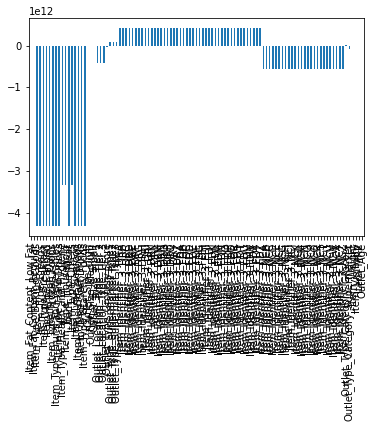

In [117]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression.csv" )

RMSE of Train Data =  1125.7184478376967
Cross validation Score  =  1136.4300046267113


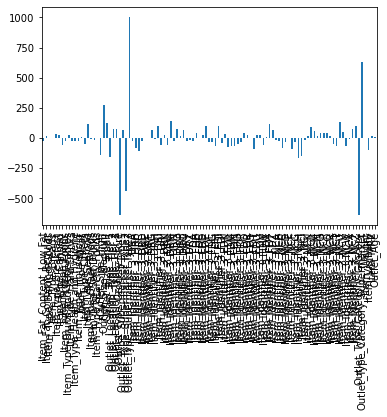

In [118]:
model = Ridge(alpha = 40)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression.csv" )

RMSE of Train Data =  1140.2658957282438
Cross validation Score  =  1141.0168273088798


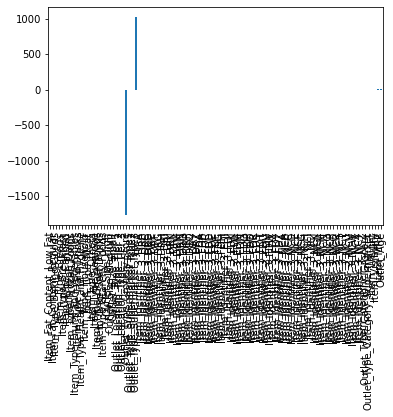

In [119]:
model = Lasso(alpha=30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression.csv" )

RMSE of Train Data =  1175.3422851510209
Cross validation Score  =  1177.5855906183072


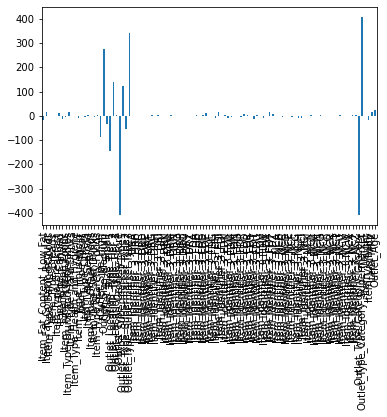

In [120]:
model = ElasticNet(alpha=0.5, l1_ratio=0.6)
run_model(model, train_X, train_y, test_X, sample, "test_result_ElasticNet_regression.csv" )

now using Polynomial_Regression 

In [121]:
from sklearn.preprocessing import PolynomialFeatures

assinging degree for the polyniomial

In [122]:
poly = PolynomialFeatures(degree=2)

In [123]:
new_train_X=poly.fit_transform(train_X)
new_test_X=poly.fit_transform(test_X)

In [124]:
new_train_X.shape

(8523, 5671)

In [125]:
new_test_X.shape

(5681, 5671)

In [126]:
sample = pd.read_csv("sample_BM.csv")
def run_model_1(model, new_train_X, train_y, new_test_X, sample, filename ):
    model.fit(new_train_X, train_y)

    pred_train = model.predict(new_train_X)
    pred_test = model.predict(new_test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    sample["Item_Outlet_Sales"] = pred_test
    sample.to_csv(filename, index = False)

In [127]:
model = LinearRegression()
run_model_1(model, new_train_X, train_y, new_test_X, sample, "test_result_Poly_Linear_regression.csv" )

RMSE of Train Data =  984.4701410528469


In [137]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [138]:
seed = 7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [142]:
score = cross_val_score(model, new_train_X, train_y, cv = kfold, scoring = "neg_root_mean_squared_error" )
print("Cross validation Score  = ",np.mean(np.abs(score)))

Cross validation Score  =  4337603.4001618195


In [140]:
score

array([-8344116.3466557 , -5948720.92835763, -1560353.38398091,
       -3378193.4639363 , -2456632.87787856])